In [1]:
%load_ext autoreload
%autoreload 2

import sys
import pickle 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sys.path.append('../')

from src.training.caseci import *
from src.explainers import *
from src.timelimit import *
from src.explainers import *

pd.set_option('display.max_columns', 500)

import tensorflow as tf

## Get a model

In [2]:
case = CaseCI()

In [3]:
%%capture --no-display
case.train_model()

In [4]:
case.save_pipe(1, 'case_mean_imp')

 ROC AUC train :  0.6738824367934839 
 ROC AUC val :  0.6408452273092748 
 ROC AUC test :  0.6412330366802789 

Precision test :  0.8477747144545097
Recall test :  0.7040641099026903


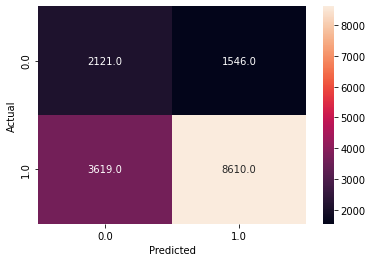

In [5]:
case.print_metrics()

## Changeable features

1.	Общее количество сделок, заключенных с организацией на текущий день. С ростом количества открытых сделок на одного клиента вероятность отказа снижается на 10%. Формулировка задачи: «Проверь по своим клиентам соблюдение контактной политики. Старайся оперативно реагировать на потребности клиента». Выводим, если менее 5 открытых сделок на одного клиента
F_5 (PDP-plot)
2.	Доля завершенных звонков среди всех активностей за 3 дня. С ростом доли звонков среди всех активностей вероятность отказа растет на 1%. «Старайся поддерживать очный контакт с клиентами». Выводим, если более 0.9 доля звонков.
F_12 (PDP-plot)
3.	Среднее количество уникальных продуктов, предложенных клиенту за 3 дня. С ростом количества уникальных предложенных продуктов вероятность отказа растет на 2%. «Старайся точно идентифицировать потребности клиента и не предлагать новые продукты без необходимости». Выводим, если более 4 количество уникальных предложенных продуктов.
F_24 (PDP-plot)
4.	Количество уникальных продуктов, предложенных клиентам за 3 дня. С ростом числа уникальных предложенных продуктов у клиента вероятность отказа растет на 0.9%. «Старайся не предлагать большой ряд продуктов, уточни потребность клиента». Выводим, если более 15 уникальных предложенных клиентам продуктов.
F_18 (PDP-plot)
5.	Среднее количество завершенных встреч и завершенных звонков за 3 дня. Если совершать встречи, вероятность отказа снижается на 0.4%. «Старайся поддерживать очный контакт с клиентом». Выводим, если нет встреч и есть звонки за последние 3 дня.
F_15, F_72 (PDP-plot)



## DiCE Report

### Generate counterfactuals for a sample n=100 using only changeable features

In [95]:
features_to_vary = ['F_5', 'F_12', 'F_24', 'F_18', 'F_15', 'F_72']

In [97]:
dice = DiCeReport(case, desired_class=0, 
                  features_to_vary=features_to_vary)
dice.create_explainer(method='random')

In [98]:
# example for one instance
dice.get_cf(7377, printout=True)

Generating cfs for 7377


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.69s/it]

Query instance (original outcome : 1)


,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,F_11,F_12,F_13,F_14,F_15,F_16,F_17,F_18,F_19,F_20,F_21,F_22,F_23,F_24,F_25,F_26,F_27,F_28,F_29,F_30,F_31,F_32,F_33,F_34,F_35,F_36,F_37,F_38,F_39,F_40,F_41,F_42,F_43,F_44,F_45,F_46,F_47,F_48,F_49,F_50,F_51,F_52,F_53,F_54,F_55,F_56,F_57,F_58,F_59,F_60,F_61,F_62,F_63,F_64,F_65,F_66,F_67,F_68,F_69,F_70,F_71,F_72,F_73,F_74,F_75,F_76,F_77,F_78,F_79,F_80,F_81,F_82,F_83,F_84,target
0,0.0,1.0,0.20713,0.0,0.6,0.0,0.5,0.2,0.0,0.071429,0.0,0.526316,1.0,0.175993,6.693604e-17,0.0,0.0,0.482386,0.141361,0.12,0.236559,0.237246,0.292683,0.0,0.0,0.0,0.208508,1.0,0.2,0.121378,0.0,1.0,0.02,0.111111,0.0,0.0,0.098468,0.0,0.0,0.0,0.390244,0.321429,0.035433,0.008156,0.098039,0.299492,0.20234,0.055249,0.138887,0.064363,0.0,0.206897,0.0,0.758621,0.257426,0.0,0.72867,1.0,0.0,0.015991,0.0,0.0,0.257258,0.051282,0.0,0.15311,0.034483,1.0,0.148805,0.756045,0.0,0.049689,0.054096,0.198107,0.0,0.0,0.0,0.84689,0.0,0.008525,0.0,0.0,0.0,0.0,0.662129,1



Diverse Counterfactual set (new outcome: 0.0)


,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,F_11,F_12,F_13,F_14,F_15,F_16,F_17,F_18,F_19,F_20,F_21,F_22,F_23,F_24,F_25,F_26,F_27,F_28,F_29,F_30,F_31,F_32,F_33,F_34,F_35,F_36,F_37,F_38,F_39,F_40,F_41,F_42,F_43,F_44,F_45,F_46,F_47,F_48,F_49,F_50,F_51,F_52,F_53,F_54,F_55,F_56,F_57,F_58,F_59,F_60,F_61,F_62,F_63,F_64,F_65,F_66,F_67,F_68,F_69,F_70,F_71,F_72,F_73,F_74,F_75,F_76,F_77,F_78,F_79,F_80,F_81,F_82,F_83,F_84,target
0,-,-,-,-,-,-,-,-,-,-,-,-,0.6,-,-,-,-,-,0.15718538,-,-,-,-,-,-,-,-,-,-,-,-,-,1.02,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1.0344827582639713,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0.0
1,-,-,-,-,-,-,-,-,-,-,-,-,0.3,-,-,-,-,-,-,-,-,-,-,-,0.1,-,-,-,-,-,-,-,1.02,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1.0344827582639713,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0.0
2,-,-,-,-,-,-,-,-,-,-,-,-,0.7,-,-,0.1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1.02,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1.0344827582639713,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0.0
3,-,-,-,-,-,0.1,-,-,-,-,-,-,-,-,-,-,-,-,0.15181359,-,-,-,-,-,-,-,-,-,-,-,-,-,1.02,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1.0344827582639713,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0.0
4,-,-,-,-,-,0.2,-,-,-,-,-,-,-,-,-,-,-,-,0.2125903,-,-,-,-,-,-,-,-,-,-,-,-,-,1.02,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1.0344827582639713,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0.0


Stopped generating cfs for 7377


In [ ]:
# %%capture --no-display
dice.evaluate_dataset(n=1, save=True, name='case_dice_cf_all')

  0%|          | 0/10156 [00:00<?, ?it/s]

Generating cfs for 7806



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.18it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 7806
Generating cfs for 4164



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.26it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 4164
Generating cfs for 6902



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.15it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 6902
Generating cfs for 10438



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 10438
Generating cfs for 11004



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.12it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 11004
Generating cfs for 13505



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.13it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 13505
Generating cfs for 6214



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 6214
Generating cfs for 10536



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.09it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 10536
Generating cfs for 7653



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.10it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 7653
Generating cfs for 5308



100%|█████████████████████████████████████████████| 1/1 [00:03<00:00,  3.36s/it]


Stopped generating cfs for 5308
 Found CF for 2 rows
Generating cfs for 10885



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.13it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 10885
Generating cfs for 13810



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.98it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 13810
Generating cfs for 9042



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 9042
Generating cfs for 397



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.09it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 397
Generating cfs for 9515



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.16it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 9515
Generating cfs for 3844



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.11it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 3844
Generating cfs for 7042



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.03it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 7042
Generating cfs for 9508



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 9508
Generating cfs for 2483



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.12it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 2483
Generating cfs for 7987



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.17it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 7987
Generating cfs for 8379



100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.25s/it]


Stopped generating cfs for 8379
 Found CF for 3 rows
Generating cfs for 14928



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.17it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 14928
Generating cfs for 1211



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.20it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 1211
Generating cfs for 12200



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.16it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 12200
Generating cfs for 4044



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.17it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 4044
Generating cfs for 8351



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.14it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 8351
Generating cfs for 6219



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.18it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 6219
Generating cfs for 15876



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.17it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 15876
Generating cfs for 9921



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.18it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 9921
Generating cfs for 10936



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.22it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 10936
Generating cfs for 93



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.19it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 93
Generating cfs for 6696



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.18it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 6696
Generating cfs for 11404



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.19it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 11404
Generating cfs for 8473



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 8473
Generating cfs for 2729



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.22it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 2729
Generating cfs for 7325



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.18it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 7325
Generating cfs for 9940



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 9940
Generating cfs for 6546



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.17it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 6546
Generating cfs for 6529



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.20it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 6529
Generating cfs for 5609



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.17it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 5609
Generating cfs for 15141



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.20it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 15141
Generating cfs for 6558



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.18it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 6558
Generating cfs for 5058



100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.30s/it]


Stopped generating cfs for 5058
 Found CF for 4 rows
Generating cfs for 3179



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.14it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 3179
Generating cfs for 8369



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.06it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 8369
Generating cfs for 1290



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.11it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 1290
Generating cfs for 2230



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 2230
Generating cfs for 6853



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.06it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 6853
Generating cfs for 15066



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.07it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 15066
Generating cfs for 3400



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.09it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 3400
Generating cfs for 10369



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 10369
Generating cfs for 8508



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.13it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 8508
Generating cfs for 3709



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 3709
Generating cfs for 10999



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.06it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 10999
Generating cfs for 9028



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.22it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 9028
Generating cfs for 15541



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.15it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 15541
Generating cfs for 13039



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.14it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 13039
Generating cfs for 14574



100%|█████████████████████████████████████████████| 1/1 [00:03<00:00,  3.13s/it]


Stopped generating cfs for 14574
 Found CF for 5 rows
Generating cfs for 12514



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 12514
Generating cfs for 11130



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.03it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 11130
Generating cfs for 3048



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.05it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 3048
Generating cfs for 11194



100%|█████████████████████████████████████████████| 1/1 [00:03<00:00,  3.42s/it]


Stopped generating cfs for 11194
 Found CF for 6 rows
Generating cfs for 10872



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.06it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 10872
Generating cfs for 9568



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.08it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 9568
Generating cfs for 3192



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.89it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 3192
Generating cfs for 11816



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.04it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 11816
Generating cfs for 14653



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.97it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 14653
Generating cfs for 14097



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.01it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 14097
Generating cfs for 12017



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.88it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 12017
Generating cfs for 7033



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.87it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 7033
Generating cfs for 5965



100%|█████████████████████████████████████████████| 1/1 [00:03<00:00,  3.50s/it]


Stopped generating cfs for 5965
 Found CF for 7 rows
Generating cfs for 11023



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.04it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 11023
Generating cfs for 6151



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 6151
Generating cfs for 10186



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.04it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 10186
Generating cfs for 1003



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 1003
Generating cfs for 1724



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 1724
Generating cfs for 6284



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.23it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 6284
Generating cfs for 3



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.23it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 3
Generating cfs for 9985



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.14it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 9985
Generating cfs for 11749



  0%|                                                     | 0/1 [00:05<?, ?it/s]


Stopped generating cfs for 11749
Generating cfs for 10810



100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.16s/it]


Stopped generating cfs for 10810
 Found CF for 8 rows
Generating cfs for 12971



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 12971
Generating cfs for 3417



100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.28s/it]


Stopped generating cfs for 3417
 Found CF for 9 rows
Generating cfs for 15309



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.99it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 15309
Generating cfs for 12068



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.13it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 12068
Generating cfs for 8953



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.07it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 8953
Generating cfs for 6993



100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.80s/it]


Only 1 (required 5)  Diverse Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 01 sec
Stopped generating cfs for 6993
 Found CF for 10 rows
Generating cfs for 11546



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 11546
Generating cfs for 12331



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 12331
Generating cfs for 5258



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.31it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 5258
Generating cfs for 6098



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.28it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 6098
Generating cfs for 152



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.22it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 152
Generating cfs for 5986



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.21it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 5986
Generating cfs for 10729



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 10729
Generating cfs for 11720



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.24it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 11720
Generating cfs for 3818



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.09it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 3818
Generating cfs for 5644



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 5644
Generating cfs for 6565



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.23it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 6565
Generating cfs for 9617



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 9617
Generating cfs for 8522



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.25it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 8522
Generating cfs for 1679



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.26it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 1679
Generating cfs for 11311



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.25it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 11311
Generating cfs for 12043



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 12043
Generating cfs for 9091



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.22it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 9091
Generating cfs for 1047



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 1047
Generating cfs for 13182



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.32it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 13182
Generating cfs for 651



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 651
Generating cfs for 5720



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.20it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 5720
Generating cfs for 8762



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.30it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 8762
Generating cfs for 1590



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.15it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 1590
Generating cfs for 306



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.18it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 306
Generating cfs for 12712



100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.88s/it]


Stopped generating cfs for 12712
 Found CF for 11 rows
Generating cfs for 7691



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 7691
Generating cfs for 9490



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.35it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 9490
Generating cfs for 10969



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.28it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 10969
Generating cfs for 8818



  0%|                                                     | 0/1 [00:05<?, ?it/s]


Stopped generating cfs for 8818
Generating cfs for 1994



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.32it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 1994
Generating cfs for 12801



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.27it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 12801
Generating cfs for 7196



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 7196
Generating cfs for 15546



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.29it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 15546
Generating cfs for 3819



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.26it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 3819
Generating cfs for 9081



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.24it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 9081
Generating cfs for 1436



  0%|                                                     | 0/1 [00:05<?, ?it/s]


Stopped generating cfs for 1436
Generating cfs for 11494



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.29it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 11494
Generating cfs for 14466



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.28it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 14466
Generating cfs for 9783



100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.55s/it]


Stopped generating cfs for 9783
 Found CF for 12 rows
Generating cfs for 2618



100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.65s/it]


Stopped generating cfs for 2618
 Found CF for 13 rows
Generating cfs for 5365



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.25it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 5365
Generating cfs for 9445



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.15it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 9445
Generating cfs for 6608



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.22it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 6608
Generating cfs for 3157



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.21it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 3157
Generating cfs for 185



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.21it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 185
Generating cfs for 7860



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 7860
Generating cfs for 5684



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.24it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 5684
Generating cfs for 11200



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.22it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 11200
Generating cfs for 2445



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.24it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 2445
Generating cfs for 5794



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.24it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 5794
Generating cfs for 6863



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.17it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 6863
Generating cfs for 15011



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.18it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 15011
Generating cfs for 12993



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.23it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 12993
Generating cfs for 15190



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.24it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 15190
Generating cfs for 8674



  0%|                                                     | 0/1 [00:05<?, ?it/s]


Stopped generating cfs for 8674
Generating cfs for 5552



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.21it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 5552
Generating cfs for 10934



100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.18s/it]


Stopped generating cfs for 10934
 Found CF for 14 rows
Generating cfs for 11119



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.15it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 11119
Generating cfs for 4586



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.24it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 4586
Generating cfs for 3935



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.26it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 3935
Generating cfs for 1526



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.25it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 1526
Generating cfs for 1405



  0%|                                                     | 0/1 [00:05<?, ?it/s]


Stopped generating cfs for 1405
Generating cfs for 1795



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 1795
Generating cfs for 13228



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 13228
Generating cfs for 10490



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.33it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 10490
Generating cfs for 4234



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.33it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 4234
Generating cfs for 6804



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 6804
Generating cfs for 6874



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.34it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 6874
Generating cfs for 8717



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.32it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 8717
Generating cfs for 2420



  0%|                                                     | 0/1 [00:05<?, ?it/s]


Stopped generating cfs for 2420
Generating cfs for 8398



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.29it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 8398
Generating cfs for 9891



  0%|                                                     | 0/1 [00:05<?, ?it/s]


Stopped generating cfs for 9891
Generating cfs for 15212



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.24it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 15212
Generating cfs for 11369



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.23it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 11369
Generating cfs for 7892



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.19it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 7892
Generating cfs for 4453



100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.58s/it]


Stopped generating cfs for 4453
 Found CF for 15 rows
Generating cfs for 6802



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.19it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 6802
Generating cfs for 4503



  0%|                                                     | 0/1 [00:05<?, ?it/s]


Stopped generating cfs for 4503
Generating cfs for 11162



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.23it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 11162
Generating cfs for 6181



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.23it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 6181
Generating cfs for 7449



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.24it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 7449
Generating cfs for 15436



100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.16s/it]


Stopped generating cfs for 15436
 Found CF for 16 rows
Generating cfs for 4974



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.25it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 4974
Generating cfs for 2879



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.25it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 2879
Generating cfs for 825



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.12it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 825
Generating cfs for 1323



  0%|                                                     | 0/1 [00:05<?, ?it/s]


Stopped generating cfs for 1323
Generating cfs for 49



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.28it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 49
Generating cfs for 6613



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.22it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 6613
Generating cfs for 6831



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.16it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 6831
Generating cfs for 6970



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.12it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 6970
Generating cfs for 14367



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.24it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 14367
Generating cfs for 11789



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.22it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 11789
Generating cfs for 3691



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.16it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 3691
Generating cfs for 5044



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.26it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 5044
Generating cfs for 5343



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.27it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 5343
Generating cfs for 5727



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.22it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 5727
Generating cfs for 15180



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.23it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 15180
Generating cfs for 9142



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.21it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 9142
Generating cfs for 11923



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.24it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 11923
Generating cfs for 3090



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 3090
Generating cfs for 12684



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.90it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 12684
Generating cfs for 9458



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.14it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 9458
Generating cfs for 11000



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.12it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 11000
Generating cfs for 2047



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.21it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 2047
Generating cfs for 10550



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 10550
Generating cfs for 2309



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.21it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 2309
Generating cfs for 12814



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.09it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 12814
Generating cfs for 10185



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.21it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 10185
Generating cfs for 14014



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.24it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 14014
Generating cfs for 10492



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.24it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 10492
Generating cfs for 4934



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.25it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 4934
Generating cfs for 433



  0%|                                                     | 0/1 [00:05<?, ?it/s]


Stopped generating cfs for 433
Generating cfs for 14770



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.15it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 14770
Generating cfs for 11175



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.04it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 11175
Generating cfs for 19



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.17it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 19
Generating cfs for 13671



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.11it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 13671
Generating cfs for 4061



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.15it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 4061
Generating cfs for 15362



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 15362
Generating cfs for 7040



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.20it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 7040
Generating cfs for 3115



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 3115
Generating cfs for 7827



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.88it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 7827
Generating cfs for 11700



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.73it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 11700
Generating cfs for 1827



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.95it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 1827
Generating cfs for 14322



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.02it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 14322
Generating cfs for 5022



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.05it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 5022
Generating cfs for 4217



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 4217
Generating cfs for 5875



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.12it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 5875
Generating cfs for 7782



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.13it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 7782
Generating cfs for 9310



100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.47s/it]


Stopped generating cfs for 9310
 Found CF for 17 rows
Generating cfs for 2501



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 2501
Generating cfs for 14161



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.06it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 14161
Generating cfs for 6864



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.09it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 6864
Generating cfs for 10971



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.10it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 10971
Generating cfs for 12398



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.17it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 12398
Generating cfs for 10112



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.75it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 10112
Generating cfs for 1410



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.74it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 1410
Generating cfs for 706



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.85it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 706
Generating cfs for 8244



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.11it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 8244
Generating cfs for 4154



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.13it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 4154
Generating cfs for 2184



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.21it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 2184
Generating cfs for 2323



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.20it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 2323
Generating cfs for 12206



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.34it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 12206
Generating cfs for 14237



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.11it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 14237
Generating cfs for 11422



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 11422
Generating cfs for 13711



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.23it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 13711
Generating cfs for 2352



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.15it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 2352
Generating cfs for 12557



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.12it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 12557
Generating cfs for 13056



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.17it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 13056
Generating cfs for 3181



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.15it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 3181
Generating cfs for 6257



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.19it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 6257
Generating cfs for 11099



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.19it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 11099
Generating cfs for 549



100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.94s/it]


Stopped generating cfs for 549
 Found CF for 18 rows
Generating cfs for 12907



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 12907
Generating cfs for 5545



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.15it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 5545
Generating cfs for 5817



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.19it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 5817
Generating cfs for 12268



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.23it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 12268
Generating cfs for 10197



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.25it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 10197
Generating cfs for 13766



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 13766
Generating cfs for 14809



  0%|                                                     | 0/1 [00:05<?, ?it/s]


Stopped generating cfs for 14809
Generating cfs for 7154



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.33it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 7154
Generating cfs for 12867



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.34it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 12867
Generating cfs for 9701



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.36it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 9701
Generating cfs for 4569



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.36it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 4569
Generating cfs for 15350



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.38it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 15350
Generating cfs for 5696



100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.49s/it]


Stopped generating cfs for 5696
 Found CF for 19 rows
Generating cfs for 14877



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 14877
Generating cfs for 89



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.11it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 89
Generating cfs for 11011



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.22it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 11011
Generating cfs for 6541



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 6541
Generating cfs for 5659



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 5659
Generating cfs for 12382



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.14it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 12382
Generating cfs for 2844



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.07it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 2844
Generating cfs for 8647



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.03it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 8647
Generating cfs for 11836



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.84it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 11836
Generating cfs for 2371



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 2371
Generating cfs for 167



100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.97s/it]


Stopped generating cfs for 167
 Found CF for 20 rows
Generating cfs for 698



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 698
Generating cfs for 12593



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.04it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 12593
Generating cfs for 15530



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.96it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 15530
Generating cfs for 12674



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.94it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 12674
Generating cfs for 5134



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 5134
Generating cfs for 3313



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.31it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 3313
Generating cfs for 10216



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.29it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 10216
Generating cfs for 7985



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 7985
Generating cfs for 1742



100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.28s/it]


Stopped generating cfs for 1742
 Found CF for 21 rows
Generating cfs for 10184



100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.56s/it]


Stopped generating cfs for 10184
 Found CF for 22 rows
Generating cfs for 7599



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.45it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 7599
Generating cfs for 10584



  0%|                                                     | 0/1 [00:05<?, ?it/s]


Stopped generating cfs for 10584
Generating cfs for 5777



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.45it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 5777
Generating cfs for 5918



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.54it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 5918
Generating cfs for 6607



  0%|                                                     | 0/1 [00:05<?, ?it/s]


Stopped generating cfs for 6607
Generating cfs for 9305



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.42it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 9305
Generating cfs for 8148



  0%|                                                     | 0/1 [00:05<?, ?it/s]


Stopped generating cfs for 8148
Generating cfs for 4230



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.40it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 4230
Generating cfs for 2002



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.47it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 2002
Generating cfs for 4862



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.45it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 4862
Generating cfs for 12817



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.22it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 12817
Generating cfs for 9431



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.37it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 9431
Generating cfs for 11972



100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.75s/it]


Stopped generating cfs for 11972
 Found CF for 23 rows
Generating cfs for 12806



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.29it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 12806
Generating cfs for 1525



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.31it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 1525
Generating cfs for 7852



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.25it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 7852
Generating cfs for 224



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.34it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 224
Generating cfs for 10405



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.29it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 10405
Generating cfs for 1817



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 1817
Generating cfs for 661



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.32it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 661
Generating cfs for 630



  0%|                                                     | 0/1 [00:05<?, ?it/s]


Stopped generating cfs for 630
Generating cfs for 14830



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.27it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 14830
Generating cfs for 7487



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.34it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 7487
Generating cfs for 15237



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.34it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 15237
Generating cfs for 15763



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.35it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 15763
Generating cfs for 14602



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.33it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 14602
Generating cfs for 13908



100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.58s/it]


Stopped generating cfs for 13908
 Found CF for 24 rows
Generating cfs for 13865



  0%|                                                     | 0/1 [00:05<?, ?it/s]


Stopped generating cfs for 13865
Generating cfs for 7796



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 7796
Generating cfs for 7983



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.36it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 7983
Generating cfs for 1664



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 1664
Generating cfs for 7236



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.27it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 7236
Generating cfs for 2908



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.27it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 2908
Generating cfs for 4905



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.25it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 4905
Generating cfs for 2582



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.25it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 2582
Generating cfs for 6801



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 6801
Generating cfs for 8296



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 8296
Generating cfs for 14863



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.24it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 14863
Generating cfs for 11632



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.32it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 11632
Generating cfs for 9684



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.33it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 9684
Generating cfs for 369



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 369
Generating cfs for 7093



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.12it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 7093
Generating cfs for 10463



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.14it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 10463
Generating cfs for 11420



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.16it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 11420
Generating cfs for 534



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.14it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 534
Generating cfs for 2688



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 2688
Generating cfs for 7693



100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.13s/it]


Stopped generating cfs for 7693
 Found CF for 25 rows
Generating cfs for 9427



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.19it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 9427
Generating cfs for 8977



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.22it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 8977
Generating cfs for 7290



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.15it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 7290
Generating cfs for 11282



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.08it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 11282
Generating cfs for 13340



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 13340
Generating cfs for 11652



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.12it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 11652
Generating cfs for 7853



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.05it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 7853
Generating cfs for 12580



100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.85s/it]


Stopped generating cfs for 12580
 Found CF for 26 rows
Generating cfs for 2625



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.24it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 2625
Generating cfs for 3865



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.27it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 3865
Generating cfs for 14131



  0%|                                                     | 0/1 [00:05<?, ?it/s]


Stopped generating cfs for 14131
Generating cfs for 12732



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.16it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 12732
Generating cfs for 729



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.15it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 729
Generating cfs for 5683



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.28it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 5683
Generating cfs for 9599



  0%|                                                     | 0/1 [00:05<?, ?it/s]


Stopped generating cfs for 9599
Generating cfs for 2249



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.28it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 2249
Generating cfs for 11967



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 11967
Generating cfs for 15335



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.95it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 15335
Generating cfs for 3698



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.26it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 3698
Generating cfs for 8274



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.99it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 8274
Generating cfs for 12283



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.97it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 12283
Generating cfs for 13296



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.21it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 13296
Generating cfs for 7875



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.16it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 7875
Generating cfs for 11643



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 11643
Generating cfs for 5001



100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.84s/it]


Stopped generating cfs for 5001
 Found CF for 27 rows
Generating cfs for 15477



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.10it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 15477
Generating cfs for 13278



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.04it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 13278
Generating cfs for 3204



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.87it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 3204
Generating cfs for 8781



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 8781
Generating cfs for 3286



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.08it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 3286
Generating cfs for 8782



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.03it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 8782
Generating cfs for 2608



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 2608
Generating cfs for 1848



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.07it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 1848
Generating cfs for 3578



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.13it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 3578
Generating cfs for 435



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 435
Generating cfs for 2210



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.16it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 2210
Generating cfs for 5413



  0%|                                                     | 0/1 [00:05<?, ?it/s]


Stopped generating cfs for 5413
Generating cfs for 2600



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.13it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 2600
Generating cfs for 12186



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.14it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 12186
Generating cfs for 10457



  0%|                                                     | 0/1 [00:05<?, ?it/s]


Stopped generating cfs for 10457
Generating cfs for 11324



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.92it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 11324
Generating cfs for 1234



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.73it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 1234
Generating cfs for 10370



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 10370
Generating cfs for 9791



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.77it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 9791
Generating cfs for 6157



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 6157
Generating cfs for 4325



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.01it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 4325
Generating cfs for 535



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 535
Generating cfs for 9539



  0%|                                                     | 0/1 [00:05<?, ?it/s]


Stopped generating cfs for 9539
Generating cfs for 2170



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 2170
Generating cfs for 9637



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.08it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 9637
Generating cfs for 442



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.04it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 442
Generating cfs for 304



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.99it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 304
Generating cfs for 2427



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.07it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 2427
Generating cfs for 8151



100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.09s/it]


Stopped generating cfs for 8151
 Found CF for 28 rows
Generating cfs for 13438



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.14it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 13438
Generating cfs for 5774



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.14it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 5774
Generating cfs for 12352



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.06it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 12352
Generating cfs for 13043



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.07it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 13043
Generating cfs for 897



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 897
Generating cfs for 14720



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 14720
Generating cfs for 11500



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.11it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 11500
Generating cfs for 8483



  0%|                                                     | 0/1 [00:05<?, ?it/s]


Stopped generating cfs for 8483
Generating cfs for 7687



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 7687
Generating cfs for 9815



100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.86s/it]


Stopped generating cfs for 9815
 Found CF for 29 rows
Generating cfs for 5030



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.13it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 5030
Generating cfs for 8136



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.08it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 8136
Generating cfs for 3826



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.11it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 3826
Generating cfs for 3763



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 3763
Generating cfs for 7549



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.15it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 7549
Generating cfs for 13108



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.24it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 13108
Generating cfs for 7294



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.26it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 7294
Generating cfs for 7760



100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.25s/it]


Stopped generating cfs for 7760
 Found CF for 30 rows
Generating cfs for 8377



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.16it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 8377
Generating cfs for 6750



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.11it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 6750
Generating cfs for 9604



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.08it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 9604
Generating cfs for 1394



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.06it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 1394
Generating cfs for 12947



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 12947
Generating cfs for 3545



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.15it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 3545
Generating cfs for 7144



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 7144
Generating cfs for 10163



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.21it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 10163
Generating cfs for 1681



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 1681
Generating cfs for 7204



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.22it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 7204
Generating cfs for 10636



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.09it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 10636
Generating cfs for 11728



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.15it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 11728
Generating cfs for 4366



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 4366
Generating cfs for 1453



100%|█████████████████████████████████████████████| 1/1 [00:03<00:00,  3.04s/it]


Stopped generating cfs for 1453
 Found CF for 31 rows
Generating cfs for 1721



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.07it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 1721
Generating cfs for 14612



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.11it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 14612
Generating cfs for 14272



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.16it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 14272
Generating cfs for 7453



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.13it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 7453
Generating cfs for 7979



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.20it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 7979
Generating cfs for 3560



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.14it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 3560
Generating cfs for 5342



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.18it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 5342
Generating cfs for 14345



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.14it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 14345
Generating cfs for 493



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.18it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 493
Generating cfs for 10013



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.17it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 10013
Generating cfs for 9751



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 9751
Generating cfs for 13403



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.16it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 13403
Generating cfs for 218



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.03it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 218
Generating cfs for 7873



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 7873
Generating cfs for 7890



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 7890
Generating cfs for 2409



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.18it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 2409
Generating cfs for 8931



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 8931
Generating cfs for 4322



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 4322
Generating cfs for 4612



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.20it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 4612
Generating cfs for 5188



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.25it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 5188
Generating cfs for 190



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 190
Generating cfs for 12630



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.20it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 12630
Generating cfs for 12891



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.19it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 12891
Generating cfs for 12072



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.22it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 12072
Generating cfs for 9613



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.10it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 9613
Generating cfs for 155



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 155
Generating cfs for 10024



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.12it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 10024
Generating cfs for 10109



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.10it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 10109
Generating cfs for 15558



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.14it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 15558
Generating cfs for 4404



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.14it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 4404
Generating cfs for 13672



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.16it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 13672
Generating cfs for 920



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.27it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 920
Generating cfs for 3405



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.30it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 3405
Generating cfs for 9963



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 9963
Generating cfs for 13149



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.32it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 13149
Generating cfs for 9098



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.36it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 9098
Generating cfs for 2556



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 2556
Generating cfs for 6093



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.23it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 6093
Generating cfs for 8073



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.15it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 8073
Generating cfs for 3038



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.18it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 3038
Generating cfs for 15441



  0%|                                                     | 0/1 [00:05<?, ?it/s]


Stopped generating cfs for 15441
Generating cfs for 13439



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 13439
Generating cfs for 12895



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.07it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 12895
Generating cfs for 13814



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.85it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 13814
Generating cfs for 15167



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.99it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 15167
Generating cfs for 6276



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.75it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 6276
Generating cfs for 3138



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.82it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 3138
Generating cfs for 1478



100%|█████████████████████████████████████████████| 1/1 [00:03<00:00,  3.49s/it]


Stopped generating cfs for 1478
 Found CF for 32 rows
Generating cfs for 10488



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.02it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 10488
Generating cfs for 11032



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 11032
Generating cfs for 7974



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.98it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 7974
Generating cfs for 10147



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.09it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 10147
Generating cfs for 7635



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.11it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 7635
Generating cfs for 15704



  0%|                                                     | 0/1 [00:05<?, ?it/s]


Stopped generating cfs for 15704
Generating cfs for 10041



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.13it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 10041
Generating cfs for 7870



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 7870
Generating cfs for 15154



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.12it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 15154
Generating cfs for 992



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.13it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 992
Generating cfs for 5087



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.12it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 5087
Generating cfs for 537



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.10it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 537
Generating cfs for 2869



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.07it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 2869
Generating cfs for 13569



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.05it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 13569
Generating cfs for 15715



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.98it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 15715
Generating cfs for 11471



  0%|                                                     | 0/1 [00:05<?, ?it/s]


Stopped generating cfs for 11471
Generating cfs for 1518



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.15it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 1518
Generating cfs for 13359



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.14it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 13359
Generating cfs for 7078



  0%|                                                     | 0/1 [00:04<?, ?it/s]


Stopped generating cfs for 7078
Generating cfs for 2938



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.05it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 2938
Generating cfs for 5153



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.09it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 5153
Generating cfs for 106



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.97it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 106
Generating cfs for 8548



100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.02it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Stopped generating cfs for 8548
Generating cfs for 2921



  0%|                                                     | 0/1 [00:00<?, ?it/s]

Simulation results on a subset:

In [ ]:
dice.print_metrics()

How dice changes features:

In [ ]:
dice.plot_diffs()

In [ ]:
dice.cfs.keys()

### Generate counterfactuals for a sample n=100 using all features

In [ ]:
# %%capture --no-display
# dice2 = DiCeReport(case, desired_class=0)
# dice2.create_explainer()
# dice2.evaluate_dataset(n=100, save=True, 
#                name='case_dice_cf_all_feats',
#                timeout=20) 
#increased timeout because all features take longer time to vary

In [ ]:
# dice2.print_metrics()

## LimeReport

In [ ]:
lime = LimeReport(case, desired_class=0, 
                  features_to_vary=features_to_vary)
lime.create_explainer()
lime.evaluate_dataset(dice.cfs)
lime.plot_coefs(-0.015,0.03)

We can see that several features have lime coefficients with different sign for the same instances, means are very close to zero. 

At the same time, for many coefficients are negative (especially for F_18 and F_12), and it doesn't support the DiCE decision to increase the values of this features.

## SLIME - try Stabilized LIME implementation (KDD 2021)

In [ ]:
slime = LimeReport(case, desired_class=0, slime=True, 
                  features_to_vary=features_to_vary)
slime.create_explainer()
slime.evaluate_dataset(dice.cfs)
slime.plot_coefs(-0.015,0.03)

Results, in general, are very similar to results of LIME. 

## SHAP

For DiCE subset:

In [ ]:
shv = ShapReport(case, desired_class=0, features_to_vary=features_to_vary)
shv.create_explainer()
shv.evaluate_dataset(dice.cfs)
shv.plot_coefs(-0.15,0.05)

For all instances:

In [ ]:
shv = ShapReport(case, desired_class=0, features_to_vary=features_to_vary)
shv.create_explainer()
shv.evaluate_dataset()
shv.plot_coefs()

## Compare results for DiCE, SHAP and SLIME

General comparison:

In [ ]:
comp = Comparator(model=case, dice=dice, sh=shv)
comp.compare_dice_slime()

In [ ]:
comp.compare_dice_shap()

Instance-level comparison: 

In [ ]:
comp.dice.cfs.keys()

In [ ]:
instance_id = 14537
comp.compare_instance(instance_id)